In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
# import geopandas as gpd
plt.style.use("ggplot")  #using style ggplot
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 1000)
from datetime import date
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import scipy.stats as stats

In [4]:
df = pd.read_csv('TSLA_5_Year.csv')

In [5]:
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1056,2021-03-16,703.349976,707.919983,671.000000,676.880005,676.880005,32195700
128,2017-07-07,62.700001,63.400002,61.476002,62.644001,62.644001,70884500
108,2017-06-08,72.750000,74.379997,72.043999,74.000000,74.000000,45307500
1188,2021-09-22,743.530029,753.669983,739.119995,751.940002,751.940002,15126300
524,2019-02-04,62.596001,63.060001,60.375999,62.577999,62.577999,36760500
776,2020-02-04,176.591995,193.798004,166.776001,177.412003,177.412003,304694000
923,2020-09-02,478.989990,479.040009,405.119995,447.369995,447.369995,96176100
161,2017-08-23,67.797997,70.697998,67.660004,70.554001,70.554001,24772500
803,2020-03-13,119.000000,121.514000,100.400002,109.323997,109.323997,113201500
595,2019-05-16,45.897999,46.200001,45.299999,45.666000,45.666000,37416500


In [6]:
df.shape

(1342, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1342 non-null   object 
 1   Open       1342 non-null   float64
 2   High       1342 non-null   float64
 3   Low        1342 non-null   float64
 4   Close      1342 non-null   float64
 5   Adj Close  1342 non-null   float64
 6   Volume     1342 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 73.5+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1.342000e+03
mean,293.747042,300.376309,286.584130,293.741256,293.741256,4.356359e+07
std,335.777594,343.486244,327.156431,335.482524,335.482524,2.961138e+07
min,36.220001,37.335999,35.397999,35.793999,35.793999,9.800600e+06
25%,60.400002,61.492501,59.260998,60.509000,60.509000,2.458988e+07
50%,70.789002,71.868000,69.821999,70.665001,70.665001,3.430435e+07
75%,602.200012,616.739990,592.877502,604.824997,604.824997,5.072438e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df2 = df

In [11]:
#Conversion data type column -  date from object to Datetime

df2["Date"]=pd.to_datetime(df2["Date"])

In [12]:
# check unique value
df2.nunique().sort_values()

High         1290
Open         1294
Low          1305
Close        1323
Adj Close    1323
Volume       1337
Date         1342
dtype: int64

In [13]:
# check duplicated  value
df2.duplicated().sum()

0

In [14]:
# make 2 column - Year & Month 

df2["Year"]=df["Date"].dt.year
df2["Month"]=df["Date"].dt.month
df2["Day"]=df["Date"].dt.day

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1342 non-null   datetime64[ns]
 1   Open       1342 non-null   float64       
 2   High       1342 non-null   float64       
 3   Low        1342 non-null   float64       
 4   Close      1342 non-null   float64       
 5   Adj Close  1342 non-null   float64       
 6   Volume     1342 non-null   int64         
 7   Year       1342 non-null   int64         
 8   Month      1342 non-null   int64         
 9   Day        1342 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 105.0 KB


In [16]:
df2.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500,2017,1,3
1,2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500,2017,1,4
2,2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500,2017,1,5
3,2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500,2017,1,6
4,2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500,2017,1,9
5,2017-01-10,46.400002,46.400002,45.377998,45.973999,45.973999,18300000,2017,1,10
6,2017-01-11,45.813999,45.995998,45.335999,45.945999,45.945999,18254000,2017,1,11
7,2017-01-12,45.812000,46.139999,45.116001,45.917999,45.917999,18951000,2017,1,12
8,2017-01-13,46.000000,47.570000,45.917999,47.549999,47.549999,30465000,2017,1,13
9,2017-01-17,47.340000,47.992001,46.874001,47.116001,47.116001,23087500,2017,1,17


# Ploting

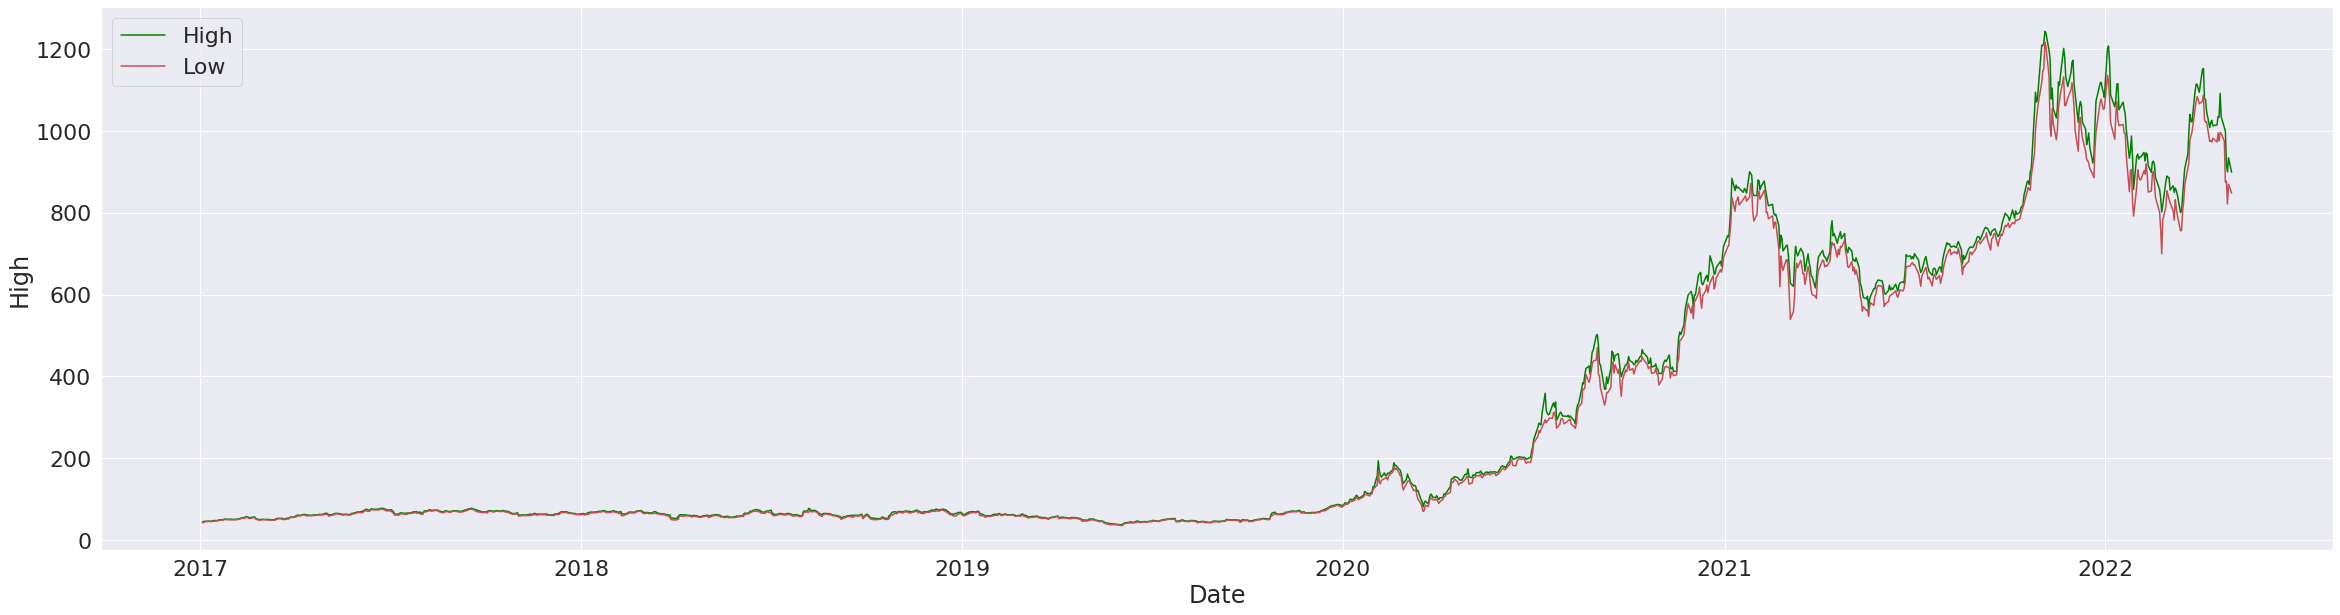

In [17]:

plt.figure(figsize=(40,10))
sns.set(font_scale = 2)

sns.lineplot(x='Date', y='High', data=df2,color = 'green',label = 'High')
sns.lineplot(x='Date', y='Low', data=df2,color = 'r',label = 'Low')


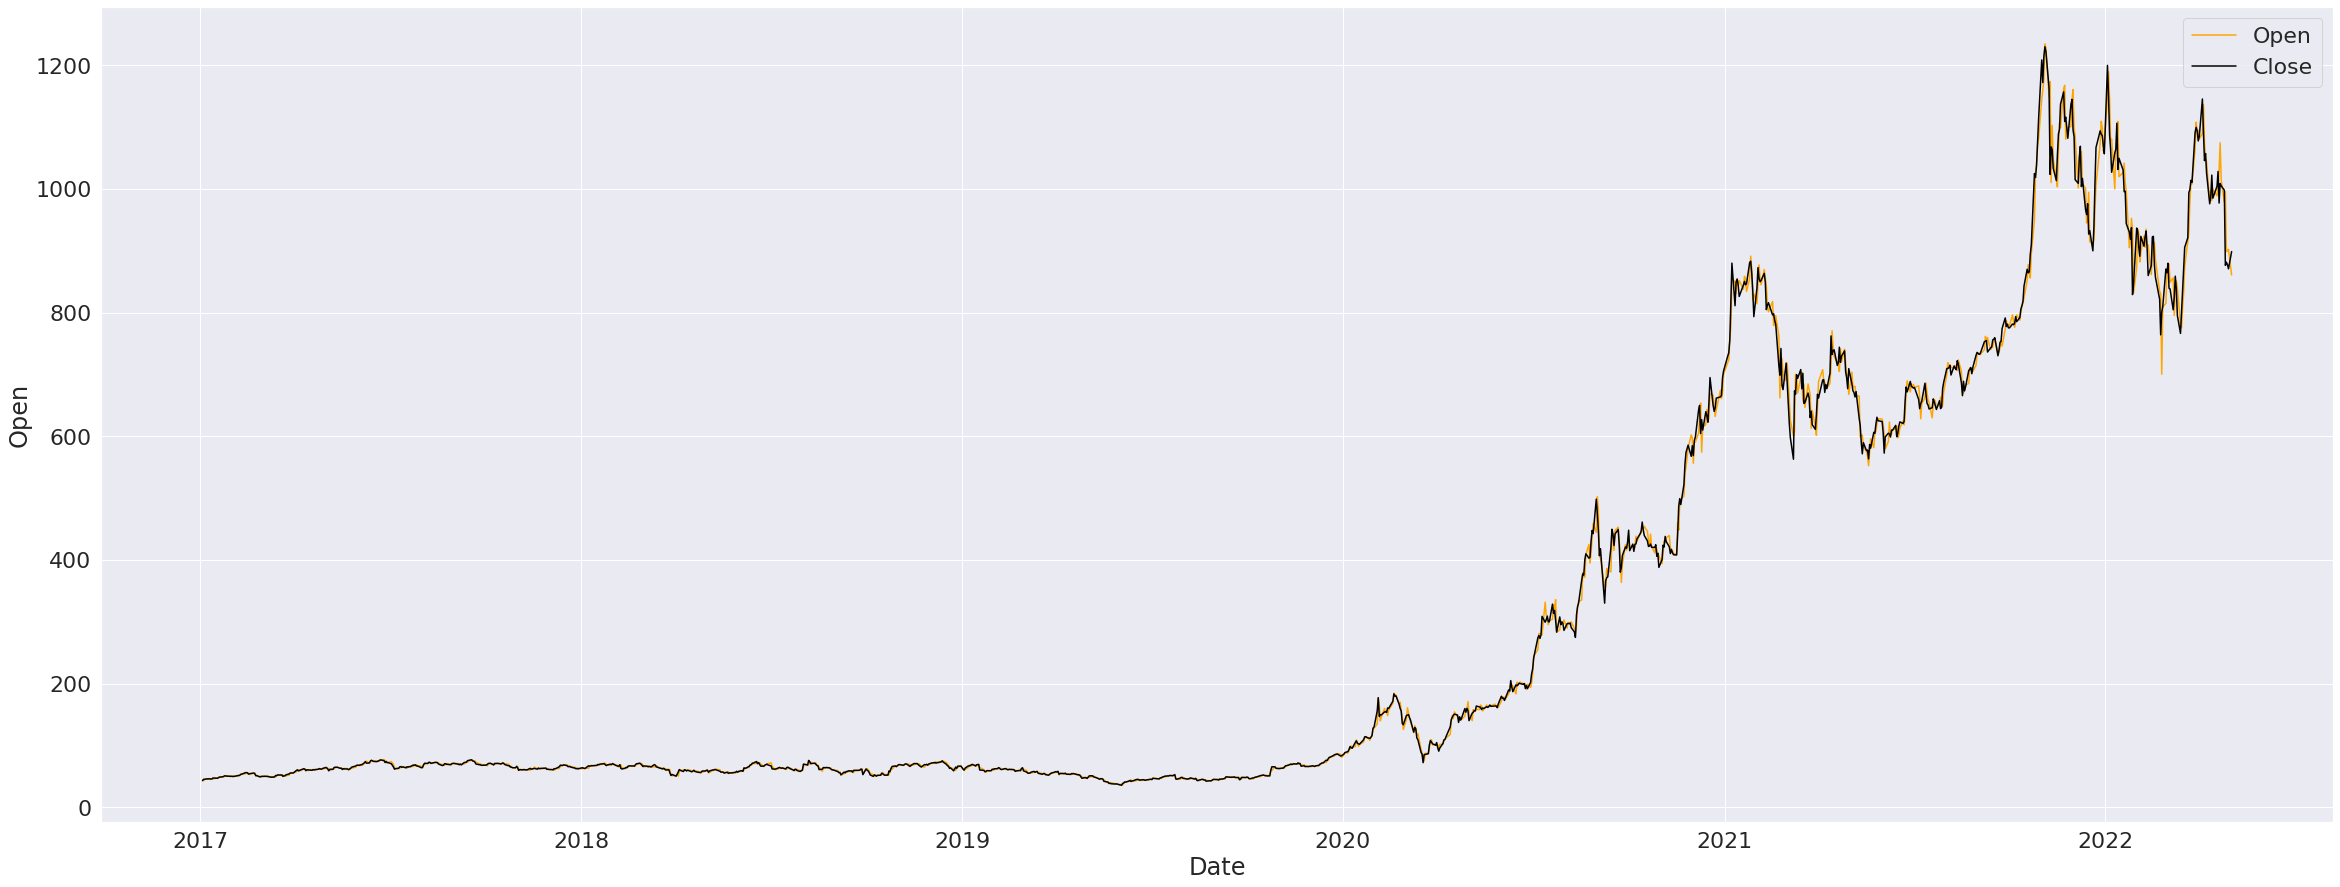

In [18]:
plt.figure(figsize=(40,15))
sns.set(font_scale = 2)

sns.lineplot(x='Date', y='Open', data=df2,color = 'orange',label = 'Open')
sns.lineplot(x='Date', y='Close', data=df2,color = 'black',label = 'Close')

In [19]:
a=df.groupby("Year")['High','Low','Open','Close'].mean().round(2)


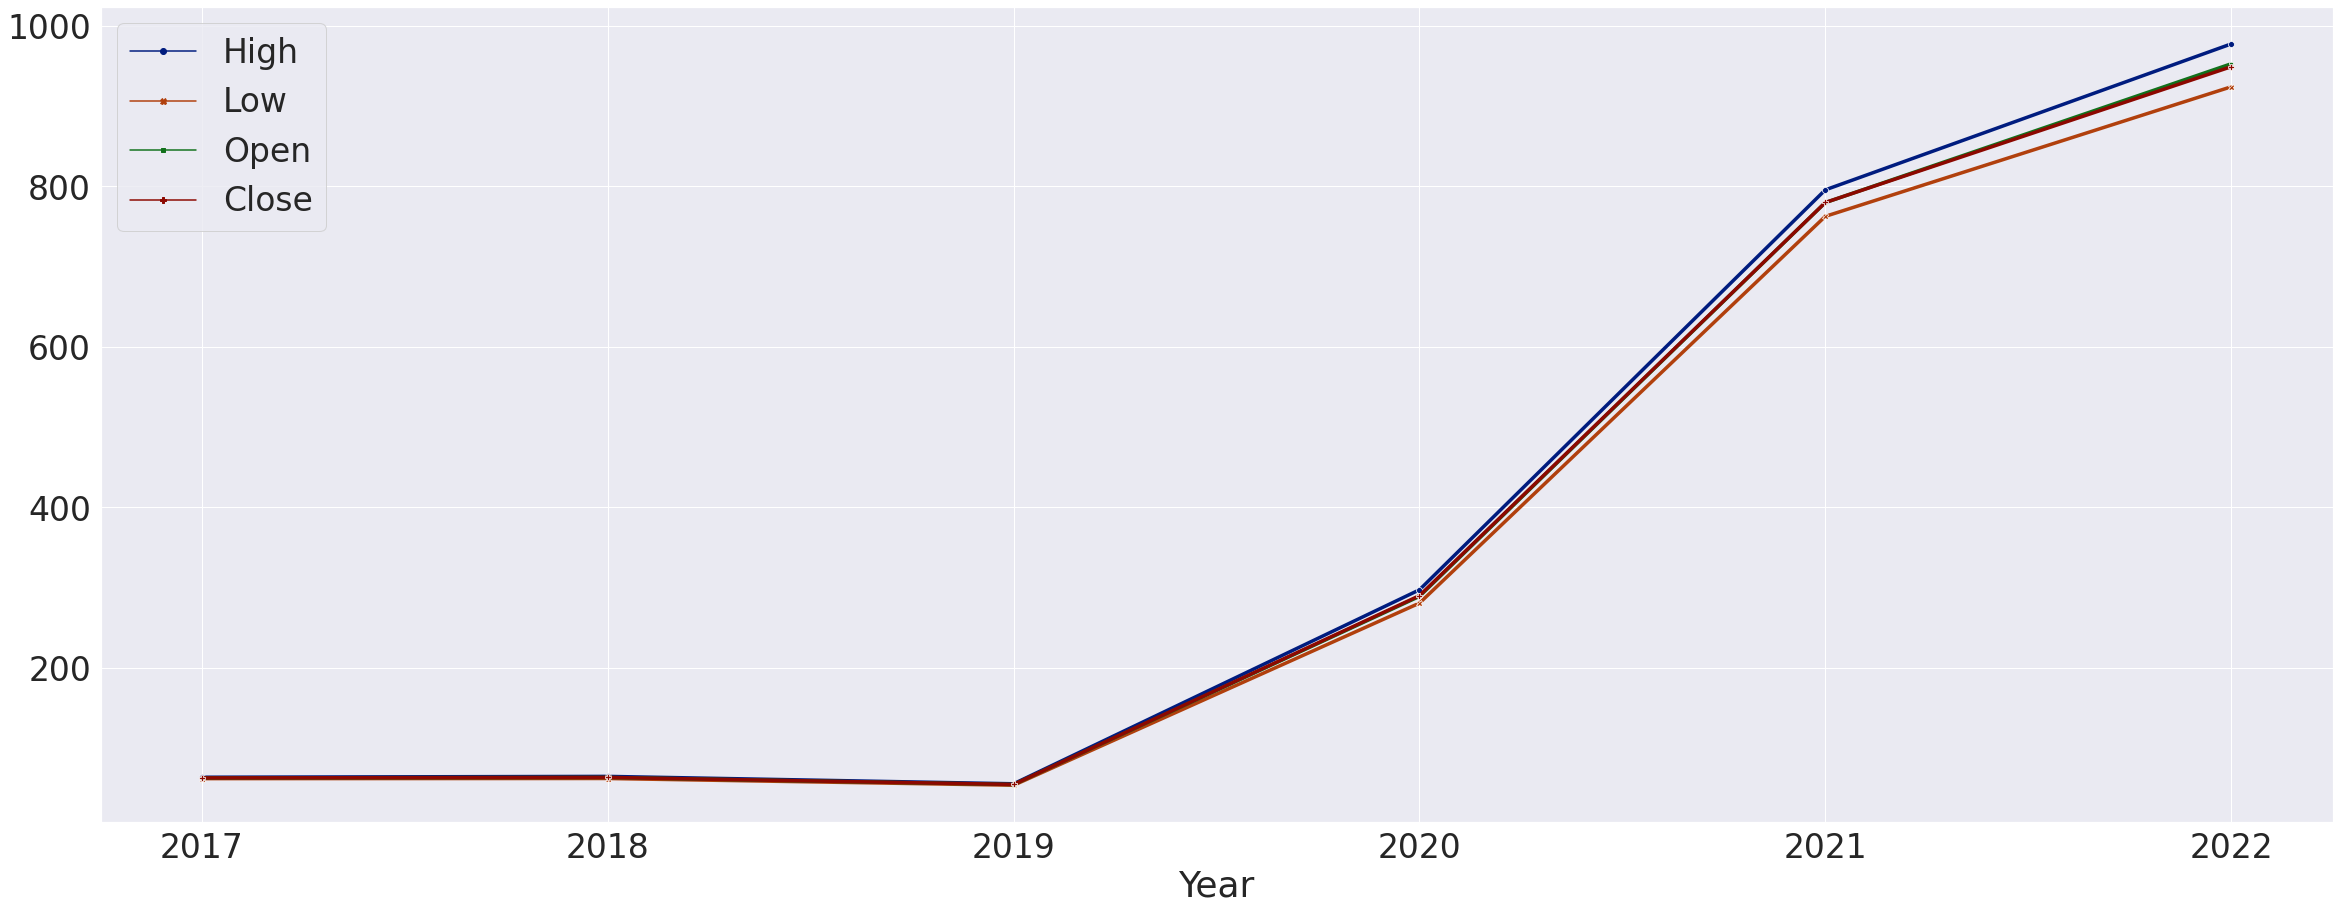

In [20]:
plt.figure(figsize=(40,15))
sns.set(font_scale = 3)
sns.lineplot(data=a,palette = "dark",sizes=(.25, 2.5),markers=True, dashes=False,legend="brief",linewidth = 3.5)

In [21]:
df2=df2.drop(["Date"],axis=1)
df2

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,42.972000,44.066002,42.192001,43.397999,43.397999,29616500,2017,1,3
1,42.950001,45.599998,42.862000,45.397999,45.397999,56067500,2017,1,4
2,45.284000,45.495998,44.389999,45.349998,45.349998,29558500,2017,1,5
3,45.386002,46.062000,45.090000,45.801998,45.801998,27639500,2017,1,6
4,45.793999,46.383999,45.599998,46.256001,46.256001,19897500,2017,1,9
...,...,...,...,...,...,...,...,...,...
1337,995.429993,1000.000000,875.000000,876.419983,876.419983,45377900,2022,4,26
1338,898.580017,918.000000,877.359985,881.510010,881.510010,25652100,2022,4,27
1339,899.979980,900.000000,821.700012,877.510010,877.510010,41649500,2022,4,28
1340,902.250000,934.400024,870.000000,870.760010,870.760010,29313400,2022,4,29


#train test split

In [22]:
x=df2.iloc[:,0:].drop(['Volume'], axis = 1)
y=df2.iloc[:,5:6]

In [23]:
x.Open.mean()

293.74704193591657

In [24]:
x.High.mean()

300.3763093859913

In [25]:
x.High.min()

37.335999

In [26]:
x.High.max()

1243.48999

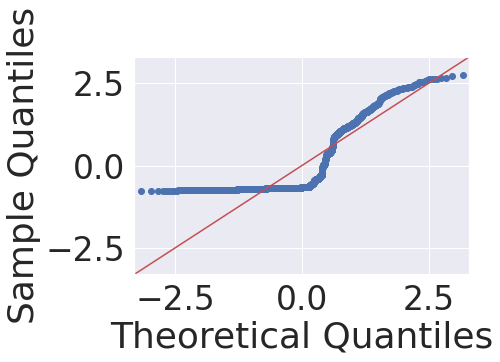

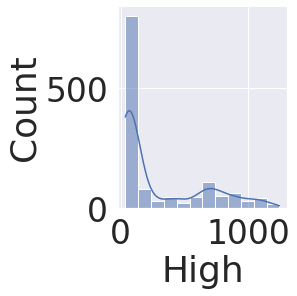

In [27]:
sm.qqplot(x.High,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(x.High, kde=True)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

use 3 standard deviation from mean

In [29]:
x.High.max()

1243.48999

In [30]:
x.High.min()

37.335999

In [31]:
upper_limit=x.High.mean()+3*x.High.std()
upper_limit

1330.835040331341

In [32]:
lower_limit=x.High.mean()-3*x.High.std()
lower_limit

-730.0824215593582

In [33]:
x[(x.High>upper_limit) | (x.High<lower_limit)]

,Open,High,Low,Close,Adj Close,Year,Month,Day


#feature scaling

Open column feature scaling

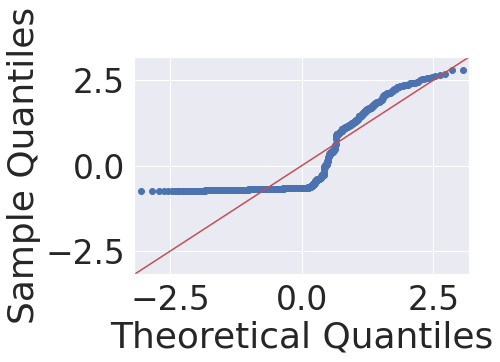

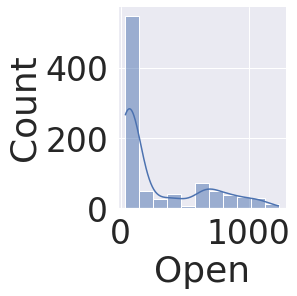

In [34]:
data=x_train.Open
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

QuantileTransformer

In [72]:
k=np.array(x_train.Open)
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(k.reshape(-1, 1))

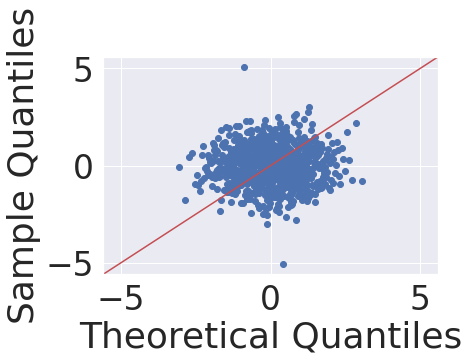

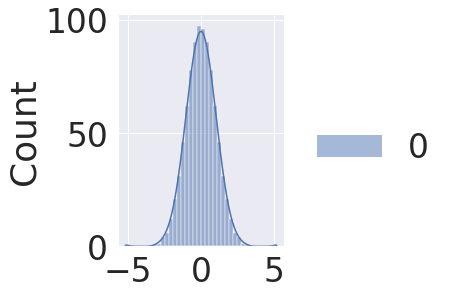

In [74]:
data=data_trans
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

box cox transformation

In [35]:
# k,parameters1=stats.boxcox(x_train.Open)

In [36]:
# data=k
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

Reciprocal Transform

**formula=1/number**

In [37]:
data=1/x_train.Open
x_train["Open"]=data

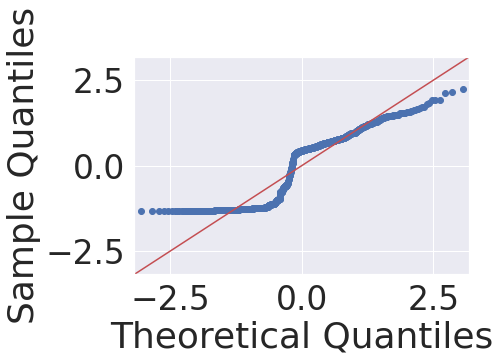

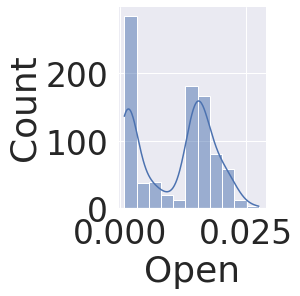

In [38]:
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

Square Root Transformation

*formula=data**0.5* 

In [39]:
# data=(x_train.Open)**0.5
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

Log Transformation

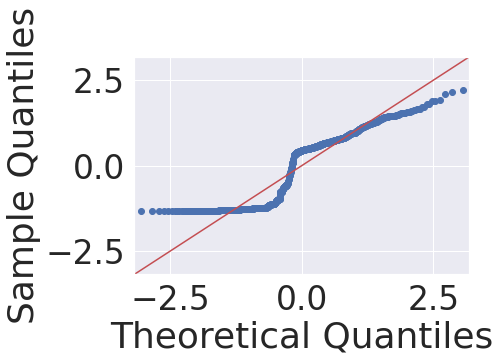

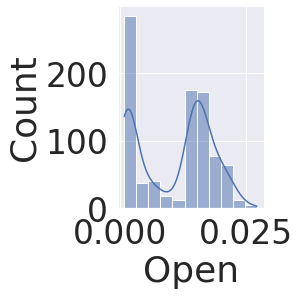

In [59]:
#log1p transformation
Log_Trans=np.log1p(x_train.Open)
data=Log_Trans
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

Standardization

In [41]:
def Standardization(feature):
  return (feature - feature.mean())/feature.std()

In [42]:
# data=Standardization(x_train.Open)
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

Normalization

In [43]:
# def Normalization(feature):
#   return (feature - feature.min())/(feature.max() - feature.min())
# Normalization(x_train.Open)

In [44]:
# data=Normalization(x_train.Open)
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

Robust_Scaler

In [45]:
# def Robust_Scaler(feature):
#   return (feature - feature.quantile(0.25))/(feature - feature.quantile(0.75))
# Robust_Scaler(x_train.Open)

In [46]:
# data=Robust_Scaler(x_train.Open)
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

Exponentaial Tranformation
*formula=data**(1/1.2)*

In [47]:
# ex_trans=(x_train.Open)**(1/1.2)

In [48]:
# data=ex_trans
# sm.qqplot(data,line='45',fit=True,dist=stats.norm)
# plt.show()
# sns.displot(data, kde=True)

In [49]:
x_train

,Open,High,Low,Close,Adj Close,Year,Month,Day
182,0.013643,73.980003,70.176003,70.218002,70.218002,2017,9,22
1243,0.000943,1062.489990,1002.359985,1003.799988,1003.799988,2021,12,9
248,0.015823,63.535999,62.150002,62.327999,62.327999,2017,12,27
231,0.016370,62.063999,61.009998,61.306000,61.306000,2017,12,1
1157,0.001408,719.030029,705.130005,713.760010,713.760010,2021,8,9
888,0.003240,310.000000,291.399994,309.201996,309.201996,2020,7,15
1176,0.001366,734.000000,724.200012,733.570007,733.570007,2021,9,3
1311,0.001144,907.849976,867.390015,905.390015,905.390015,2022,3,18
1048,0.001525,668.450012,600.000000,621.440002,621.440002,2021,3,4
80,0.016138,62.959999,61.599998,62.813999,62.813999,2017,4,28


feature scaling in High column

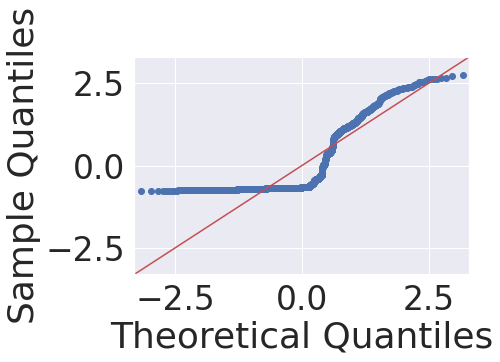

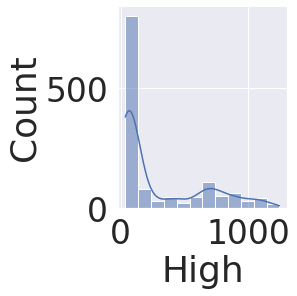

In [50]:
data=df2.High
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

Reciprocal Transform

**formula=1/number**

In [51]:
data=1/x_train.High
# x_train["Open"]=data
data_high=data

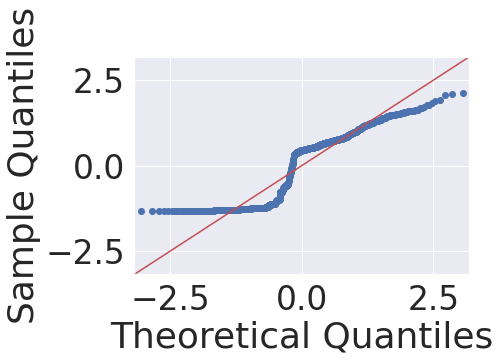

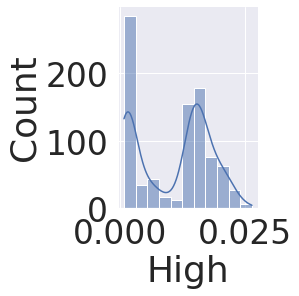

In [52]:
data=data_high
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

In [53]:
Standardization(data_high)

182     0.389918
1243   -1.316726
248     0.691451
231     0.742109
1157   -1.255716
888    -1.006688
1176   -1.259565
1311   -1.294970
1048   -1.241434
80      0.710991
547     0.931449
987    -1.217885
744     0.315687
376     0.415665
837    -0.566398
417     0.731381
938    -1.104760
710     0.647850
882    -0.969786
735     0.563876
263     0.490953
954    -1.146816
1181   -1.262241
704     1.170321
294     0.572772
450     1.001772
333     0.811161
1113   -1.221981
251     0.662075
791    -0.610165
551     0.852625
538     0.795672
1304   -1.286756
772    -0.294005
102     0.534414
38      1.258869
935    -1.146640
123     0.384480
817    -0.071625
1216   -1.332274
165     0.499492
962    -1.120260
1241   -1.316144
622     1.566702
490     0.353274
572     1.050615
76      0.740489
293     0.564530
760    -0.045240
826    -0.550998
642     1.105755
1011   -1.291022
459     0.510075
60      0.961695
51      1.112867
1016   -1.286634
43      1.228097
785    -0.655459
486     0.3435

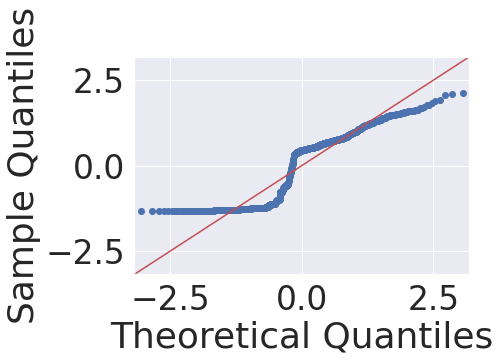

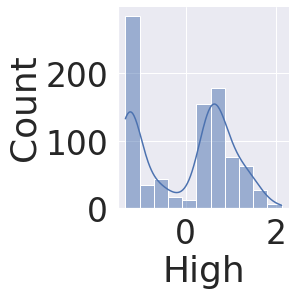

In [54]:
data=Standardization(data_high)
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

Robust_Scaler

In [55]:
def Robust_Scaler(feature):
  return (feature - feature.quantile(0.25))/(feature - feature.quantile(0.75))
Robust_Scaler(x_train.High)

182      -0.023224
1243      2.208413
248      -0.003641
231      -0.000941
1157      5.989077
888      -0.830246
1176      5.390389
1311      2.834230
1048     10.251704
80       -0.002583
547       0.008025
987     -52.278157
744      -0.029223
376      -0.021270
837      -0.204543
417      -0.001501
938      -1.611209
710      -0.006082
882      -0.693833
735      -0.011119
263      -0.015894
954      -2.572740
1181      5.041178
704       0.017312
294      -0.010563
450       0.010967
333       0.002522
1113    731.268000
251      -0.005273
791      -0.226412
551       0.004491
538       0.001766
1304      3.179384
772      -0.114822
102      -0.013000
38        0.020301
935      -2.566458
123      -0.023645
817      -0.073086
1216      1.912075
165      -0.015314
962      -1.872809
1241      2.221402
622       0.029212
490      -0.026115
572       0.012902
76       -0.001025
293      -0.011078
760      -0.069181
826      -0.197527
642       0.014990
1011      2.989903
459      -0.

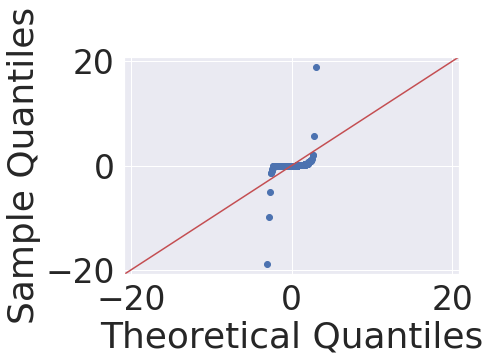

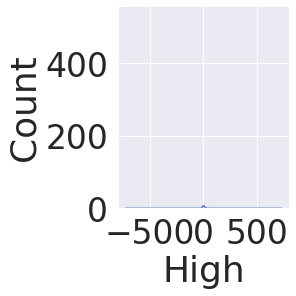

In [56]:
data=Robust_Scaler(x_train.High)
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

Volume column 

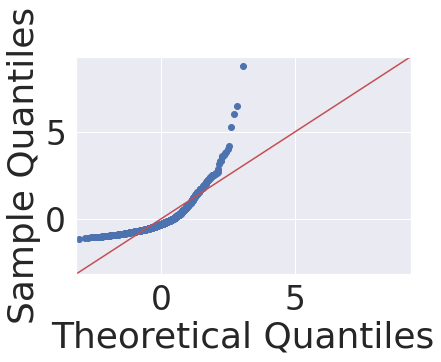

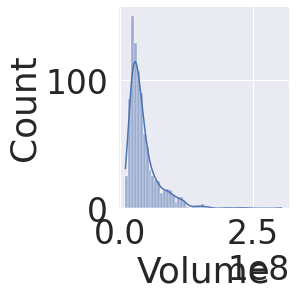

In [68]:
data=y_train.Volume
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

log transformation

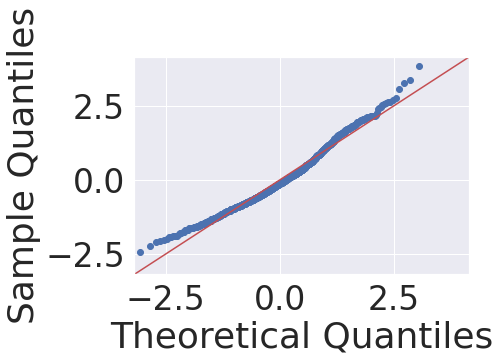

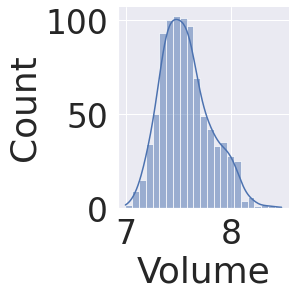

In [69]:
Log_Trans=np.log10(y_train.Volume)
data=Log_Trans
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

boxcox transformation

In [76]:
k,parameters1=stats.boxcox(y_train.Volume)

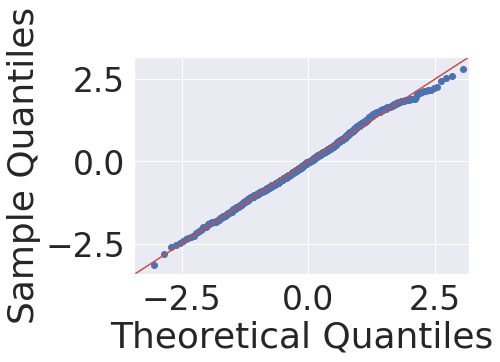

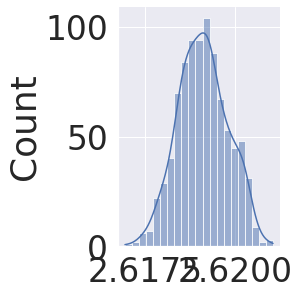

In [78]:
data=k
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)

In [80]:
k=np.array(y_train.Volume)
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(k.reshape(-1, 1))

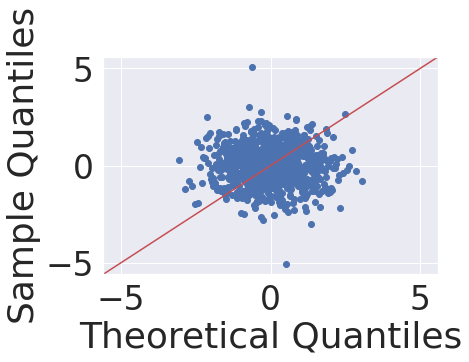

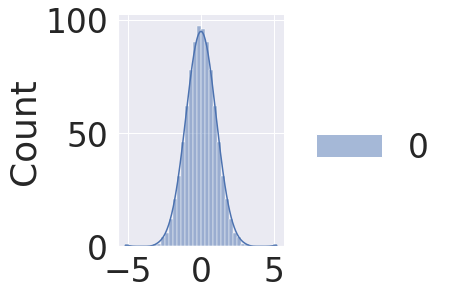

In [82]:
data=data_trans
sm.qqplot(data,line='45',fit=True,dist=stats.norm)
plt.show()
sns.displot(data, kde=True)